# Reverse String Solutions

In [1]:
def reverse_string(input_string):
    """First reverse string solution"""
    output_string = ""
    
    for character in input_string:
        
        output_string = character + output_string
    
    return output_string

assert reverse_string('abcdef') == 'fedcba'
assert reverse_string('moon') == 'noom'


In [2]:
# slice syntax [start:stop:step] and each has reasonable default values

def reverse_string_2(input_string):
    """Second reverse string solution"""
    return input_string[::-1]

assert reverse_string_2('abcdef') == 'fedcba'
assert reverse_string_2('moon') == 'noom'


# Can You Spell Solutions

In [3]:
# can_you_spell(['y','n','p','g','n','l'],"lynn") would print YES

def can_you_spell(lol, word):
    """First can you spell solution"""
    for letter in word:
        if letter in lol:
            lol.remove(letter)
        else:
            return "NO"
    return "YES"

assert can_you_spell(['y','n','p','g','n','l'],"lynn") == "YES"
assert can_you_spell(['y','n','p','g','l'],"lynn") == "NO"


In [4]:
from collections import Counter

def can_you_spell_2(letters, word):
    """Second can you spell solution"""
    letters_counter = Counter(letters)
    word_counter = Counter(word)
    for k in word_counter.keys():
        if word_counter[k] > letters_counter[k]:
            return "NO"
    return "YES"
    
assert can_you_spell_2(['y','n','p','g','n','l'],"lynn") == "YES"
assert can_you_spell_2(['y','n','p','g','l'],"lynn") == "NO"


# Wall clock

First, we'll look at different ways to measure time complexity using "wall clock" or the time an algorithm takes to run while we're sipping our coffee and twiddling our thumbs.

Note that measuring an algorithm with a "wall clock" is somewhat noisy. If Slack is loading a bunch of gifs in the background, it's going to affect the amount of time our algorithm takes. 

## Single measurement

First, we'll use cell magic to time a single line.

We can use string multiplication to copy the input string many times and vary that multiplication to see how the size of the input affects the runtime of the algorithm

In [5]:
%timeit reverse_string('abcdef'*1000)


1.01 ms ± 29.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [6]:
%timeit reverse_string_2('abcdef'*1000)


2.78 µs ± 53.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [7]:
%timeit can_you_spell(['y','n','p','g','n', 'l']*100,"lynn"*100)


1.48 ms ± 344 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [8]:
%timeit can_you_spell_2(['y','n','p','g','n', 'l']*100,"lynn"*100)


35.9 µs ± 886 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Programatic measurement of wall clock using timeit module

Running a single line gives us some insight into the complexity of these algorithms, but we can add some rigor to our investigation by testing the algorithm at many different input sizes and keeping track of our measurements.

In the above code, jupyter intelligently guesses how many times to run the command so that it gets in as many runs as it can without taking too long. Having a lot of measurements is good because of the variability in wall clock measurements. In the code below, though, we want to set up the same testing condition for each input size, so we'll manually set the number of runs. Explore the [`timeit`](https://docs.python.org/3/library/timeit.html) documentation for more information on the arguments we're using.

One particular part is worth quoting:

> It’s tempting to calculate mean and standard deviation from the result vector and report these. However, this is not very useful. In a typical case, the lowest value gives a lower bound for how fast your machine can run the given code snippet; higher values in the result vector are typically not caused by variability in Python’s speed, but by other processes interfering with your timing accuracy. So the **`min()`** of the result is probably the only number you should be interested in. After that, you should look at the entire vector and apply common sense rather than statistics.

We'll follow the recommendation and use `min()` below.


Finally, the way timeit works is that it executes the command we pass it in a separate python interpreter. In order to use functions and variables we've defined, we have to manually pass those to the module. The lazy way to do this is to pass it everything we've defined so far with `globals()`.

In [9]:
import timeit
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [10]:
# how to use timeit programatically 
# a single run

num_loops = 100
num_repeats = 10
runtime = min(
    timeit.repeat(
        'reverse_string("abcdef"*100)',
        globals=globals(),
        repeat=num_repeats,
        number=num_loops))
print(runtime)


0.006140377000001251


# Reverse String Solutions

Text(0, 0.5, 'runtime (s)')

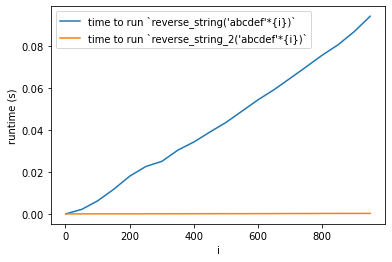

In [11]:
num_loops = 100
num_repeats = 10

rev_1_times = []
rev_2_times = []
lengths = list(range(1,1000,50)) # this is where we define the input sizes we'll use
for i in lengths:
    
    runtime = min(
        timeit.repeat(
            f'reverse_string("abcdef"*{i})',
            globals=globals(),
            repeat=num_repeats,
            number=num_loops))
    rev_1_times.append(runtime)
    
    runtime = min(
        timeit.repeat(
            f'reverse_string_2("abcdef"*{i})',
            globals=globals(),
            repeat=num_repeats,
            number=num_loops))
    rev_2_times.append(runtime)
    
plot(lengths, rev_1_times, label="time to run `reverse_string('abcdef'*{i})`")
plot(lengths, rev_2_times, label="time to run `reverse_string_2('abcdef'*{i})`")
legend()
xlabel("i")
ylabel("runtime (s)")

Text(0, 0.5, 'runtime (s)')

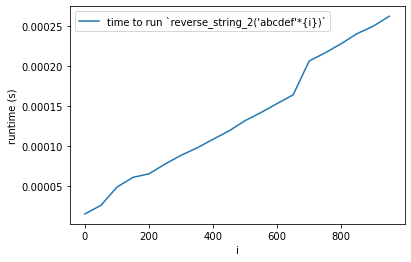

In [12]:
# reverse_string_2 looks constant but that's unexpected. 
# Let's see it on its own.

plot(lengths, rev_2_times, label="time to run `reverse_string_2('abcdef'*{i})`")
legend()
xlabel("i")
ylabel("runtime (s)")

Conclusions:

`reverse_string` and `reverse_string_2` both likely have $O(n)$ runtime. But not all $O(n)$ functions are equal! Here we can see that the constant multiplier makes a huge difference in real time.

## Can You Spell Solutions

In [13]:
fun_to_run = [
    "can_you_spell(['h','i','y']*{i},'hi'*{i})",
    "can_you_spell_2(['h','i','y']*{i},'hi'*{i})"
]
fun = fun_to_run[0]
fun.format(i=10)

"can_you_spell(['h','i','y']*10,'hi'*10)"

Text(0, 0.5, 'runtime (s)')

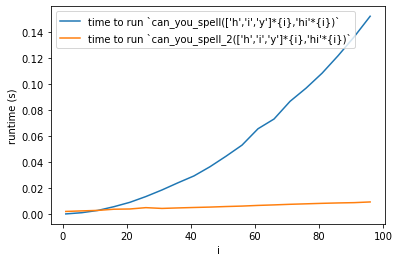

In [14]:
# case where n=m

num_loops = 500
num_repeats = 10


fun_to_run = [
    "can_you_spell(['h','i','y']*{i},'hi'*{i})",
    "can_you_spell_2(['h','i','y']*{i},'hi'*{i})"
]

lengths = list(range(1,100,5))
runtimes = []
for fun in fun_to_run:
    fun_runtimes = []
    for i in lengths:
        runtime = min(
            timeit.repeat(
                fun.format(i=i),
                globals=globals(),
                repeat=num_repeats,
                number=num_loops))
        fun_runtimes.append(runtime)
    runtimes.append(fun_runtimes)

plot(lengths, runtimes[0], label=f"time to run `{fun_to_run[0]}`")
plot(lengths, runtimes[1], label=f"time to run `{fun_to_run[1]}`")
legend()
xlabel("i")
ylabel("runtime (s)")

### Check for understanding

What do the above results say about our two competing algorithms, `can_you_spell` and `can_you_spell2`?

### We Code

> The above cell looks at cases where the lenth of the input characters $n$ and the length of the query string $m$ are roughly equal $n=m$. Modify that code to test 2 new cases
>
> 1) the case where $n$ is much greater than $m$, $n>>m$.
>
> 2) the case where $m$ is much greater than $n$, $m>>n$.

(Give students about 5 minutes to work on this. After, ask students how they solved and display solution below if none of the students arrived at it) 

Text(0, 0.5, 'runtime (s)')

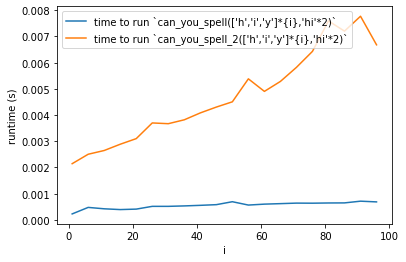

In [15]:
# case where n>>m

### BEGIN SOLUTION

num_loops = 500
num_repeats = 10

fun_to_run = [
    "can_you_spell(['h','i','y']*{i},'hi'*2)",
    "can_you_spell_2(['h','i','y']*{i},'hi'*2)"
]

lengths = list(range(1,100,5))
runtimes = []
for fun in fun_to_run:
    fun_runtimes = []
    for i in lengths:
        runtime = mean(
            timeit.repeat(
                fun.format(i=i),
                globals=globals(),
                repeat=num_repeats,
                number=num_loops))
        fun_runtimes.append(runtime)
    runtimes.append(fun_runtimes)

plot(lengths, runtimes[0], label=f"time to run `{fun_to_run[0]}`")
plot(lengths, runtimes[1], label=f"time to run `{fun_to_run[1]}`")
legend()
xlabel("i")
ylabel("runtime (s)")

### END SOLUTION

Text(0, 0.5, 'runtime (s)')

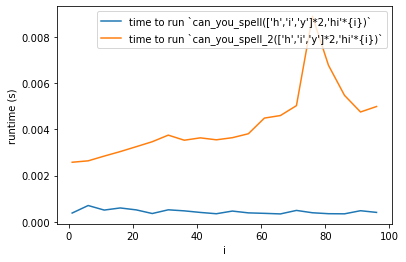

In [16]:
# case where m>>n


### BEGIN SOLUTION

num_loops = 500
num_repeats = 10

fun_to_run = [
    "can_you_spell(['h','i','y']*2,'hi'*{i})",
    "can_you_spell_2(['h','i','y']*2,'hi'*{i})"
]

lengths = list(range(1,100,5))
runtimes = []
for fun in fun_to_run:
    fun_runtimes = []
    for i in lengths:
        runtime = mean(
            timeit.repeat(
                fun.format(i=i),
                globals=globals(),
                repeat=num_repeats,
                number=num_loops))
        fun_runtimes.append(runtime)
    runtimes.append(fun_runtimes)

plot(lengths, runtimes[0], label=f"time to run `{fun_to_run[0]}`")
plot(lengths, runtimes[1], label=f"time to run `{fun_to_run[1]}`")
legend()
xlabel("i")
ylabel("runtime (s)")

### END SOLUTION


### Check for understanding

With these new results, what can we say about `can_you_spell` and `can_you_spell2`?

Conclusions:

When $n >> m$ or $m >> n$, both `can_you_spell` seems to have constant runtime $O(1)$ and  `can_you_spell_2` seems to have linear runtime $O(n)$ or $O(m)$.

However, when $n=m$, `can_you_spell` appears to have $O(n*m)$ runtime while `can_you_spell_2` seems closer to linear $O(n)$

# Using lprun


While the wall clock method can be quite useful, we often want to get at a more general measure of time complexity, the big-O complexity discussed in lecture. A very helpful technique for this is to use a line profiler that counts the number of executions for each line. 

In [17]:
# install line_profiler  if you need them

# !conda install -n metis line_profiler -y

In [18]:
%load_ext line_profiler

In [35]:
n = 1000; m = 10000

In [36]:
%lprun -f can_you_spell  can_you_spell(['y','n','p','g','n', 'l']*n,"lynn"*m)

## You code

Use the above example to profile the above code using different values of `m` and `n`.

Given the results you see, write out the **full equation** in terms of execution of lines for $f(n)$. 

Once you've done this, simplify your result to big-O complexity.

| m | n | count | 
|---|---|-------|
| 1000 | 1000 | 12,000 |
| 100 | 100 | 1,200 |
| 10 | 10 | 120 |
| 1000 | 10 | 120 |
| 10 | 1000 | 120 |
| 1000 | 100 | 1,200 |

From this it appears that $f(n) = 12*\min(m,n)$

Using the heuristic method, we can say that $f(n) = O(\min(m,n))$